![alt text](https://omdena.com/wp-content/uploads/2019/12/logo-2.png)

## Project: <b>AI for Disaster Response: Improving Emergency Management During Cyclones</b>

Sponsor: World Food Programme, United Nations

<b>Developers</b> :<br> 
*Juber Rahman, Vamsi Krishna Gutta, and Xavier Tores*<br> 
Machine Learning Engineer, Omdena</b><br>
<b>Contributors</b>:<br>
*Devika Bhatia, Anel Nurkayeva, Rosana de Oliveira Gomes, Dev Bharti, Begoña Echavarren, Erick Almaraz, Fabiana Castiblanco, Joseph Itopa Abubakar, Pratibha Gupta, Arnab Saha, Beata, Chinmay Krishnan K C, Francis Onyango, Geethanjali Battula, Grivine Ochieng Otieno, Jeremiah Kamama, Krzysztof Augustowski, Nithima, Raghuram, Rishab Balakrishnan,Rohit Nagotkar, Sijuade Oguntayo, Susanne Brockmann, Tefy lucky rakotomahefa,Thiago Cunha Montenegro, Yousof Mardoukhi*<br>
<b>Acknowledgements</b> :<br> 
*Rudradeb Mitra*, CEO, Omdena<br>
*Raghu Nallabotula*, World Food Programme<br>
## Problem: Quick disaster response
When a disaster strikes, the World Food Programme (WFP), as well as the other humanitarian actors, need to design comprehensive emergency operations. They need to know what to bring and in which quantity.  How many shelters? How many tons of food? These needs assessments are conducted by humanitarian experts, based on the first information collected, their knowledge and their experience.

What if we could use past disaster data to help them know what is needed?

### Summary of Materials and Methods:

* Dataset used: merged dataset version 14 (OUTPUT_WBI_exposer_cyclones_v14.csv)
* Data processing : filling missing values, encoding categorical features, dealing skewed distribution
* Missing value: KNN Imputer
* Hyper-parameter tuning: Grid Search CV
* Ensemble Methods: Random Forest, Gradient Boosting Method
* Feature Engineering: Log Conversion
* No. of actual Predictors: 45
* Target: Number of people affected
* Validation scheme: 5-fold cross-validation, Test set performance, Unit test performance
* Train set (80%), Test set (20%)

<b>Models:</b>
* Random Forest (RF)
* Gradient Boosting Method (GBM)
* Support Vector Regression
* Voting ensemble of RF and GBM
* Stack of Ensembles 
* Auto ML

### Findings and Discussions:
* Best performing model: <b>Stack of Ensembles </b>
* Performance: RMSLE=2.41 , R-squared value=0.37 
* The model is good in predicting the mid-impact cyclones 
* For low impact cyclones predictions are over-estimated
* Overall trend shows a weak but expected trend



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import math

In [2]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from warnings import simplefilter
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [3]:
df = pd.read_csv(r'OUTPUT_WBI_exposer_cyclones_v14.csv', sep=";")

## Data pre-processing

In [4]:
df.shape

(991, 51)

In [5]:
df.columns

Index(['SID', 'NAME', 'ISO', 'YEAR', 'COORDS', 'COORDS_MAX_WINDS',
       'COORDS_MIN_DIST2LAND', 'BASIN', 'SUB BASIN', 'MONTH_START',
       'MONTH_END', 'DATE_START', 'DATE_END', 'DATE_LAND_START',
       'DATE_LAND_END', 'TOTAL_HOURS_EVENT', 'TOTAL_HOURS_IN_LAND', 'NATURE',
       'GENERAL_CATEGORY', 'MAX_WIND', 'MIN_PRES', 'MIN_DIST2LAND',
       'MAX_STORMSPEED', 'MAX_USA_SSHS', 'MAX_USA_SSHS_INLAND', 'V_LAND_KN',
       'DISTANCE_TRACK', 'DISTANCE_TRACK_VINCENTY', '34KN_POP', '64KN_POP',
       '96KN_POP', '64KN_ASSETS', '34KN_ASSETS', '96KN_ASSETS',
       'TOTAL_DAMAGE_(000$)', 'TOTAL_DEATHS', 'POP_DEN_SQ_KM', 'RURAL_POP(%)',
       'HDI', 'Arable land (hectares per person)',
       'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Income_level_Final'

In [6]:
# Arranging columns

df = df[[
    # cols from cyclones
    'SID', 'NAME', 'ISO', 'YEAR', 'COORDS', 'COORDS_MAX_WINDS',
       'COORDS_MIN_DIST2LAND', 'BASIN', 'SUB BASIN', 'NATURE', 
    'MONTH_START',
    #'MONTH_END', 'DATE_START', 'DATE_END', 'DATE_LAND_START', 'DATE_LAND_END', 
    'TOTAL_HOURS_EVENT', 'TOTAL_HOURS_IN_LAND', 
       'GENERAL_CATEGORY', 'MAX_WIND', 'MIN_PRES', 'MIN_DIST2LAND',
       'MAX_STORMSPEED', 'MAX_USA_SSHS', 'MAX_USA_SSHS_INLAND', 'V_LAND_KN',
       'DISTANCE_TRACK', 'DISTANCE_TRACK_VINCENTY', '34KN_POP', '64KN_POP',
       '96KN_POP', '64KN_ASSETS', '34KN_ASSETS', '96KN_ASSETS',
       'TOTAL_DAMAGE_(000$)', 'TOTAL_DEATHS', 
    

    # cols from World Bank Indicators:           
    'POP_DEN_SQ_KM', 'RURAL_POP(%)',
       'HDI', 'Arable land (hectares per person)',
       'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Income_level_Final',
    
    
    # cols from climada:   
        'POP_MAX_34_ADJ', 'POP_MAX_50_ADJ','POP_MAX_64_ADJ',
    
    # Target 
    'TOTAL_AFFECTED']]

In [7]:
df.head(3)

,SID,NAME,ISO,YEAR,COORDS,COORDS_MAX_WINDS,COORDS_MIN_DIST2LAND,BASIN,SUB BASIN,NATURE,...,Food production index (2004-2006 = 100),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),Income_level_Final,POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED
0,1949163N07145,DELLA,JPN,1949,"[(21.5, 125.424), (22.2, 125.8), (22.9089, 126...","[(27.6584, 128.82), (28.9141, 129.572999999999...","[(31.9866, 130.683), (33.5183, 130.97299999999...",WP,WP,TS,...,67.79,8607.657082,0.0,67.666098,2.867878,Low,1.198300e+07,5.803981e+06,3.320907e+06,194046
1,1950241N23140,JANE,JPN,1950,"[(23.8845, 139.74), (23.9335, 139.639), (23.98...","[(28.7509, 133.748), (29.1201, 133.762), (29.6...","[(34.9374, 135.476), (36.1016, 136.095), (37.2...",WP,WP,ET,...,67.79,8607.657082,0.0,67.666098,2.867878,Low,3.160822e+07,1.559196e+07,1.018936e+07,642117
2,1951224N12316,CHARLIE,JAM,1951,"[(17.3398, -75.4138), (17.6, -76.2), (17.9, -7...","[(17.6, -76.2), (17.9, -76.9)]","[(17.9, -76.9), (18.1, -77.8)]",NAm,CS,TS,...,69.93,3796.219401,0.0,64.770000,2.578304,Low,1.689243e+06,1.687083e+06,1.195052e+06,20200


- **Checking nulls**

In [8]:
# Checking quantity of missing data. Reusing code from Fabi
def null_cols(data):

    """
    This function takes a dataframe df and shows the columns of df that have NaN values
    and the number of them

    """
    nulls = data.isna().sum()
    nulls = nulls[nulls > 0] / len(data) * 100
    nulls = pd.DataFrame(nulls.sort_values(ascending = False))
    nulls = nulls.reset_index().rename(columns = {"index": "Feature", 0: "% Null rows"})
    return nulls

In [9]:
null_cols(df)

,Feature,% Null rows
0,TOTAL_DAMAGE_(000$),31.584258
1,64KN_ASSETS,23.309788
2,34KN_ASSETS,23.309788
3,96KN_ASSETS,23.309788
4,34KN_POP,23.208880
5,64KN_POP,23.208880
6,96KN_POP,23.208880
7,TOTAL_DEATHS,13.118063
8,POP_MAX_50_ADJ,8.072654
9,POP_MAX_64_ADJ,8.072654


- **BASIN and SUBBASIN**: 'MM' value means missing, and **USA_SSHS** column with value -5 = Unknown [XX]:

In [10]:
df["SUB BASIN"]= df["SUB BASIN"].replace('MM', np.nan) 
df["BASIN"]= df["BASIN"].replace('MM', np.nan) 
#df["USA_SSHS"]= df["USA_SSHS"].replace(-5, np.nan) 

- As damage in '000 USD is time-money sensitive, we can use the CPI for that data point to calculate **"Total Damage Adjusted"** 
by dividing Total Damage by the CPI. We then drop columns for Damage and CPI.
CPI meaning = https://en.wikipedia.org/wiki/Consumer_price_index

In [11]:
#df["TOTAL_DAMAGE_(000$)_Adjusted"]= df["TOTAL_DAMAGE_(000$)"] / df["CPI"]
#df["TOTAL_DAMAGE_(000$)_Adjusted"]= df["TOTAL_DAMAGE_(000$)_Adjusted"].replace(0, np.nan)

In [12]:
#df = df.drop(["TOTAL_DAMAGE_(000$)",'CPI'], axis=1)
#df["TOTAL_DAMAGE_(000$)_Adjusted"].isna().sum()

- Trying to create a calculated column that better represents de relative dimension **of exposed assets**. We have several columns for assets exposed depending of windspeed for 34kn+, 64kn+ and 96kn+. Let's add these columns to create a new column:

In [13]:
df['CALC_assets_emdat'] = df['34KN_ASSETS'] + df['64KN_ASSETS'] + df['96KN_ASSETS']
df = df.drop(['34KN_ASSETS', '64KN_ASSETS','96KN_ASSETS'], axis=1)

 - Extracting **month of cyclone**

In [14]:
#df['MONTH'] = df.ISO_TIME.apply(lambda x: x[7:9]).astype(int)

- **Transform 'Income_Level'** categories to ordered integers and **YEAR, BASIN, SUB BASIN and USA_SSHS** into Category Type

In [15]:
#Arnab code
unique_list = df['Income_level_Final'].unique()
incomelevel_to_int = dict(zip(unique_list, [1,2,4,3])) # so we assign['Low' =1, 'Low_Middle' =2, 'High'=4, 'High_Middle'=3]
df['Income_level_Final'] = df['Income_level_Final'].apply(lambda inc_level: incomelevel_to_int[inc_level])

In [16]:
df['YEAR'] = df['YEAR'].astype('category')
df['BASIN'] = df['BASIN'].astype('category')
df['SUB BASIN'] = df['SUB BASIN'].astype('category')
df['NATURE'] = df['NATURE'].astype('category')
df['GENERAL_CATEGORY'] = df['GENERAL_CATEGORY'].astype('category')
df['MAX_USA_SSHS']= df['MAX_USA_SSHS'].astype('category')

- **Create New Column fro 'No Landing'**

In [17]:
df['Landing'] = np.where(df['MAX_USA_SSHS_INLAND'] == 'No landing', 0, 1)

In [18]:
#assign np.nan to columns with 'No landing'  value
#df["DATE_LAND_START"]= df["DATE_LAND_START"].replace('No landing', np.nan) 
#df["DATE_LAND_END"]= df["DATE_LAND_END"].replace('No landing', np.nan) 
df["MAX_USA_SSHS_INLAND"]= df["MAX_USA_SSHS_INLAND"].replace('No landing', np.nan) 

- **Arranging columns**

In [19]:
df.shape

(991, 45)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 45 columns):
SID                                                   991 non-null object
NAME                                                  991 non-null object
ISO                                                   991 non-null object
YEAR                                                  991 non-null category
COORDS                                                991 non-null object
COORDS_MAX_WINDS                                      991 non-null object
COORDS_MIN_DIST2LAND                                  991 non-null object
BASIN                                                 991 non-null category
SUB BASIN                                             991 non-null category
NATURE                                                991 non-null category
MONTH_START                                           991 non-null int64
TOTAL_HOURS_EVENT                                     991 non-null float64

In [21]:
df["MAX_USA_SSHS_INLAND"] = df['MAX_USA_SSHS_INLAND'].astype(float)

In [22]:
df["MAX_USA_SSHS_INLAND"].describe()

count    773.000000
mean       0.815006
std        1.620204
min       -6.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: MAX_USA_SSHS_INLAND, dtype: float64

In [23]:
df.shape

(991, 45)

In [24]:
df.columns

Index(['SID', 'NAME', 'ISO', 'YEAR', 'COORDS', 'COORDS_MAX_WINDS',
       'COORDS_MIN_DIST2LAND', 'BASIN', 'SUB BASIN', 'NATURE', 'MONTH_START',
       'TOTAL_HOURS_EVENT', 'TOTAL_HOURS_IN_LAND', 'GENERAL_CATEGORY',
       'MAX_WIND', 'MIN_PRES', 'MIN_DIST2LAND', 'MAX_STORMSPEED',
       'MAX_USA_SSHS', 'MAX_USA_SSHS_INLAND', 'V_LAND_KN', 'DISTANCE_TRACK',
       'DISTANCE_TRACK_VINCENTY', '34KN_POP', '64KN_POP', '96KN_POP',
       'TOTAL_DAMAGE_(000$)', 'TOTAL_DEATHS', 'POP_DEN_SQ_KM', 'RURAL_POP(%)',
       'HDI', 'Arable land (hectares per person)',
       'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Income_level_Final', 'POP_MAX_34_ADJ', 'POP_MAX_50_ADJ',
       'POP_MAX_64_ADJ', 'TOTAL_AFFECTED', 'CALC_assets_emdat', 'Landing'],
      dtype='object'

In [25]:
#taking out from model=    'SID', 'NAME', 'ISO', 'YEAR', 'COORDS', 'COORDS_MAX_WINDS','COORDS_MIN_DIST2LAND', 
# Arranging columns

df = df[[
    # cols from cyclones
    'BASIN', 'SUB BASIN', 'NATURE', 'MONTH_START',
       'TOTAL_HOURS_EVENT', 'TOTAL_HOURS_IN_LAND', 'GENERAL_CATEGORY',
       'MAX_WIND', 'MIN_PRES', 'MIN_DIST2LAND', 'MAX_STORMSPEED',
       'MAX_USA_SSHS', 'MAX_USA_SSHS_INLAND', 'V_LAND_KN', 'DISTANCE_TRACK',
       'DISTANCE_TRACK_VINCENTY', '34KN_POP', '64KN_POP', '96KN_POP',
       'TOTAL_DAMAGE_(000$)', 'CALC_assets_emdat', 'Landing', 
    'TOTAL_DEATHS',
    

    # cols from World Bank Indicators:           
    'POP_DEN_SQ_KM', 'RURAL_POP(%)',
       'HDI', 'Arable land (hectares per person)',
       'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Income_level_Final',
    
    
    # cols from climada:   
        'POP_MAX_34_ADJ', 'POP_MAX_50_ADJ', 'POP_MAX_64_ADJ',
    
    # Target 
    'TOTAL_AFFECTED']]

- **Check SKEWENESS and apply log**

In [26]:
#determine index for continous variables
num_feats = df.dtypes[df.dtypes != 'object'].index

#Calculate skew and sort
skew_feats = df[num_feats].skew().sort_values(ascending = False)
skewness = pd.DataFrame({'Skew': skew_feats})

In [27]:
skewness

,Skew
V_LAND_KN,31.476292
TOTAL_DEATHS,28.415189
TOTAL_DAMAGE_(000$),11.715782
TOTAL_AFFECTED,7.297631
96KN_POP,6.794800
Arable land (hectares per person),5.355443
POP_MAX_50_ADJ,4.316617
TOTAL_HOURS_IN_LAND,3.992451
POP_MAX_64_ADJ,3.731450
POP_MAX_34_ADJ,3.270495


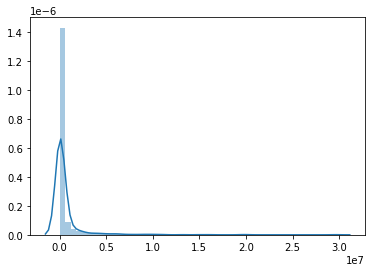

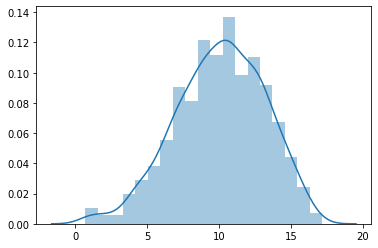

<Figure size 432x288 with 0 Axes>

In [28]:
# Checking distribution for one feature---reusing code from Juber
ax=sns.distplot(df['TOTAL_AFFECTED'].values)

plt.show()
plt.clf()

log_affected=np.log(df['TOTAL_AFFECTED'].values)
ax=sns.distplot(log_affected)

plt.show()
plt.clf()

In [29]:
# Creating list of features to transform, for skew values above 2.02

feats_to_log = skewness[skewness['Skew'] > 2.02].index

In [30]:
feats_to_log

Index(['V_LAND_KN', 'TOTAL_DEATHS', 'TOTAL_DAMAGE_(000$)', 'TOTAL_AFFECTED',
       '96KN_POP', 'Arable land (hectares per person)', 'POP_MAX_50_ADJ',
       'TOTAL_HOURS_IN_LAND', 'POP_MAX_64_ADJ', 'POP_MAX_34_ADJ', '64KN_POP',
       'CALC_assets_emdat', 'MIN_DIST2LAND',
       'Adjusted savings: education expenditure (% of GNI)',
       'Net flows from UN agencies US$'],
      dtype='object')

In [31]:
# as log cannot be perfomed to negative numbers, a common technique for handling negative values is to 
# add a constant value to the data prior to applying the log transform. The transformation is 
#therefore log(Y+a) where a is the constant. Some people like to choose a so that min(Y+a) is a very small 
#positive number (like 0.001). Others choose a so that min(Y+a) = 1. For the latter choice, you can show 
# that a = b – min(Y), where b is either a small number or is 1.
# Source : https://blogs.sas.com/content/iml/2011/04/27/log-transformations-how-to-handle-negative-data-values.html

for item in feats_to_log:
    #df[item]=np.log((df[item] + 1 - df[item].min()).values)
    df[item] = df[item].apply(lambda x: np.log(x) if x>0 else 0)
    

In [32]:
df[feats_to_log].describe()

,V_LAND_KN,TOTAL_DEATHS,TOTAL_DAMAGE_(000$),TOTAL_AFFECTED,96KN_POP,Arable land (hectares per person),POP_MAX_50_ADJ,TOTAL_HOURS_IN_LAND,POP_MAX_64_ADJ,POP_MAX_34_ADJ,64KN_POP,CALC_assets_emdat,MIN_DIST2LAND,Adjusted savings: education expenditure (% of GNI),Net flows from UN agencies US$
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,4.440666,2.581518,7.634230,10.086995,4.178269,-2.198147,13.440581,1.894751,11.811131,14.579118,8.124430,19.169811,0.878179,1.041226,12.844241
std,0.445265,1.897505,5.631716,3.102598,6.142951,0.895685,5.166569,1.581078,5.680212,4.828227,7.289062,11.197377,1.706180,0.495848,7.012986
min,3.401197,0.000000,0.000000,0.693147,0.000000,-5.423870,0.000000,-0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,-0.618261,0.000000
25%,4.138361,1.098612,0.000000,8.018896,0.000000,-2.814166,13.210954,0.000000,11.292152,14.467834,0.000000,17.291178,0.000000,0.609766,13.845069
50%,4.497585,2.484907,9.680344,10.308953,0.000000,-2.362625,15.077483,1.791759,14.019712,16.057954,11.513145,24.508645,0.000000,1.029619,16.325922
75%,4.747537,3.850148,12.206073,12.413181,10.945113,-1.642416,16.525255,3.178054,15.435987,17.208886,15.194754,26.779700,0.000000,1.451725,17.263907
max,11.614498,11.837658,18.643824,17.204028,17.419063,1.121473,19.590919,5.808142,18.491778,19.746421,17.919354,30.327386,5.293305,2.639771,19.029087


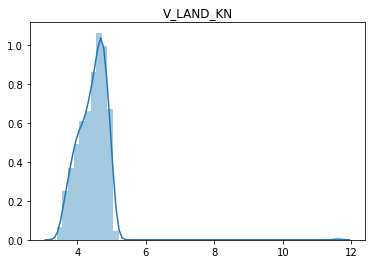

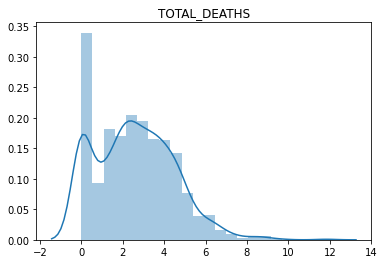

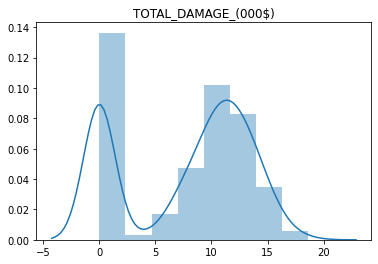

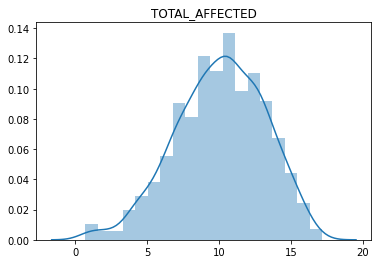

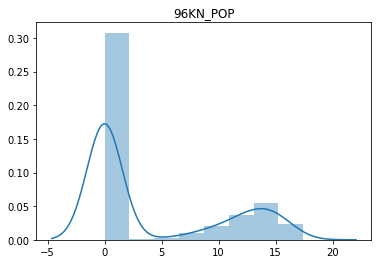

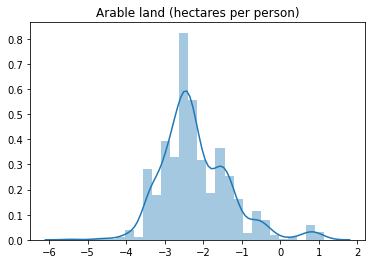

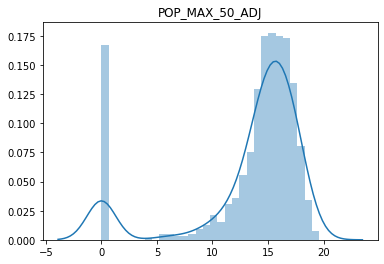

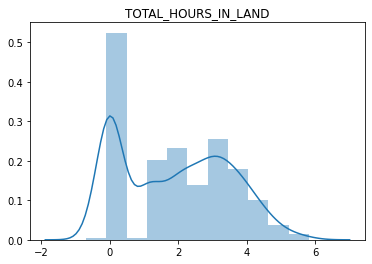

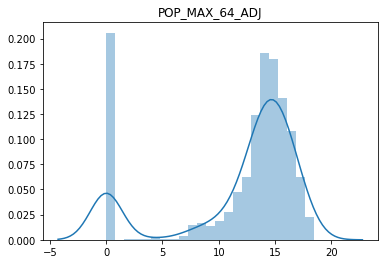

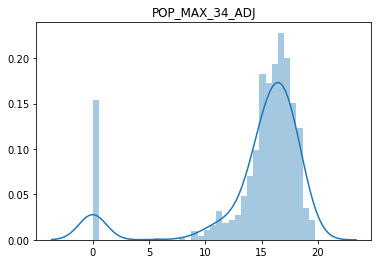

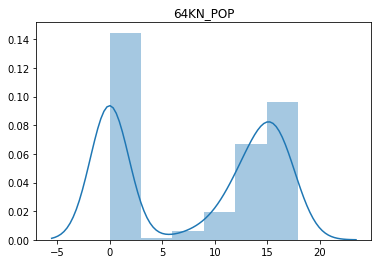

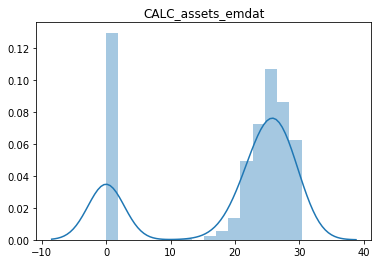

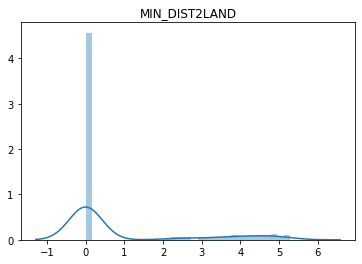

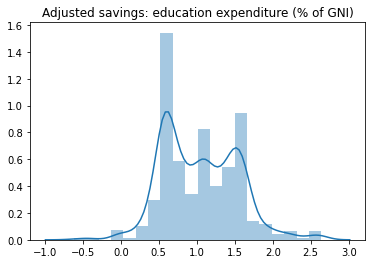

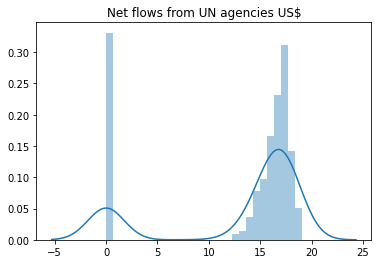

<Figure size 432x288 with 0 Axes>

In [33]:
for item in feats_to_log:
    ax=sns.distplot(df[item].values)
    ax.set_title(item);
    plt.show()
    plt.clf()


In [34]:
df.describe()

,MONTH_START,TOTAL_HOURS_EVENT,TOTAL_HOURS_IN_LAND,MAX_WIND,MIN_PRES,MIN_DIST2LAND,MAX_STORMSPEED,MAX_USA_SSHS_INLAND,V_LAND_KN,DISTANCE_TRACK,...,Food production index (2004-2006 = 100),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),Income_level_Final,POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,989.000000,773.000000,991.000000,991.000000,...,987.000000,982.000000,991.000000,987.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,7.770938,89.267238,1.894751,86.881699,939.110999,0.878179,18.303832,0.815006,4.440666,1531.223549,...,93.329764,9911.140931,12.844241,70.304835,1.041226,2.454087,14.579118,13.440581,11.811131,10.086995
std,2.766138,73.284572,1.581078,33.635653,137.722579,1.706180,9.563449,1.620204,0.445265,1131.468382,...,29.318225,15185.727417,7.012986,7.495767,0.495848,0.947970,4.828227,5.166569,5.680212,3.102598
min,1.000000,0.000000,-0.693147,0.000000,0.000000,0.000000,0.000000,-6.000000,3.401197,0.000000,...,13.360000,141.276363,0.000000,41.762000,-0.618261,1.000000,0.000000,0.000000,0.000000,0.693147
25%,7.000000,33.000000,0.000000,60.000000,937.000000,0.000000,13.000000,0.000000,4.138361,619.385014,...,76.160000,1412.947077,13.845069,66.511671,0.609766,2.000000,14.467834,13.210954,11.292152,8.018896
50%,8.000000,75.000000,1.791759,85.000000,960.000000,0.000000,16.000000,0.000000,4.497585,1382.779275,...,98.770000,2605.425404,16.325922,70.802000,1.029619,2.000000,16.057954,15.077483,14.019712,10.308953
75%,10.000000,123.000000,3.178054,115.000000,980.000000,0.000000,21.000000,2.000000,4.747537,2028.372252,...,113.950000,8918.568543,17.263907,75.087500,1.451725,3.000000,17.208886,16.525255,15.435987,12.413181
max,12.000000,516.000000,5.808142,185.000000,1013.000000,5.293305,69.000000,5.000000,11.614498,6074.566991,...,202.377089,86150.462210,19.029087,84.099756,2.639771,4.000000,19.746421,19.590919,18.491778,17.204028


- **One hot encoding for categorical variables**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 38 columns):
BASIN                                                 991 non-null category
SUB BASIN                                             991 non-null category
NATURE                                                991 non-null category
MONTH_START                                           991 non-null int64
TOTAL_HOURS_EVENT                                     991 non-null float64
TOTAL_HOURS_IN_LAND                                   991 non-null float64
GENERAL_CATEGORY                                      991 non-null category
MAX_WIND                                              991 non-null float64
MIN_PRES                                              991 non-null int64
MIN_DIST2LAND                                         991 non-null float64
MAX_STORMSPEED                                        989 non-null float64
MAX_USA_SSHS                                          991 non-null cat

In [36]:
cat_feats = df.dtypes[df.dtypes == 'category'].index
cat_feats

Index(['BASIN', 'SUB BASIN', 'NATURE', 'GENERAL_CATEGORY', 'MAX_USA_SSHS'], dtype='object')

In [37]:
feats_to_dummy = cat_feats #selecting feats to make one-hot encoding

for feature in feats_to_dummy:
    dummy = pd.get_dummies(df[feature], prefix=feature)
    df = pd.concat([df,dummy], axis=1)

In [38]:
# Dropping dummed features
df = df.drop(feats_to_dummy, axis=1)

In [39]:
df.columns

Index(['MONTH_START', 'TOTAL_HOURS_EVENT', 'TOTAL_HOURS_IN_LAND', 'MAX_WIND',
       'MIN_PRES', 'MIN_DIST2LAND', 'MAX_STORMSPEED', 'MAX_USA_SSHS_INLAND',
       'V_LAND_KN', 'DISTANCE_TRACK', 'DISTANCE_TRACK_VINCENTY', '34KN_POP',
       '64KN_POP', '96KN_POP', 'TOTAL_DAMAGE_(000$)', 'CALC_assets_emdat',
       'Landing', 'TOTAL_DEATHS', 'POP_DEN_SQ_KM', 'RURAL_POP(%)', 'HDI',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Income_level_Final', 'POP_MAX_34_ADJ', 'POP_MAX_50_ADJ',
       'POP_MAX_64_ADJ', 'TOTAL_AFFECTED', 'BASIN_EP', 'BASIN_NAm', 'BASIN_NI',
       'BASIN_SI', 'BASIN_SP', 'BASIN_WP', 'SUB BASIN_AS', 'SUB BASIN_BB',
       'SUB BASIN_CP', 'SUB BASIN_CS', 'SUB BASIN_EA', 'SUB BASIN_EP',
       'SUB

In [40]:
df.shape

(991, 76)

In [41]:
#Droping Basin and keeping subBasin because has higher granularity,
#column arrangement 
df = df[[
    
     # here columns from cyclones dataset:
    'MONTH_START', 'TOTAL_HOURS_EVENT', 'TOTAL_HOURS_IN_LAND', 'MAX_WIND',
       'MIN_PRES', 'MIN_DIST2LAND', 'MAX_STORMSPEED', 'MAX_USA_SSHS_-6',
       'MAX_USA_SSHS_-5', 'MAX_USA_SSHS_-4', 'MAX_USA_SSHS_-3',
       'MAX_USA_SSHS_-2', 'MAX_USA_SSHS_-1', 'MAX_USA_SSHS_0',
       'MAX_USA_SSHS_1', 'MAX_USA_SSHS_2', 'MAX_USA_SSHS_3', 'MAX_USA_SSHS_4',
       'MAX_USA_SSHS_5',
       'MAX_USA_SSHS_INLAND', 'V_LAND_KN', 'DISTANCE_TRACK',
       'DISTANCE_TRACK_VINCENTY', '34KN_POP', '64KN_POP', '96KN_POP',
        'Landing', 
    'BASIN_EP', 'BASIN_NAm', 'BASIN_NI',
       'BASIN_SI', 'BASIN_SP', 'BASIN_WP', 'SUB BASIN_AS', 'SUB BASIN_BB',
       'SUB BASIN_CP', 'SUB BASIN_CS', 'SUB BASIN_EA', 'SUB BASIN_EP',
       'SUB BASIN_GM', 'SUB BASIN_NAm', 'SUB BASIN_SI', 'SUB BASIN_SP',
       'SUB BASIN_WA', 'SUB BASIN_WP', 'NATURE_DS', 'NATURE_ET', 'NATURE_MX',
       'NATURE_NR', 'NATURE_SS', 'NATURE_TS', 'GENERAL_CATEGORY_Cat 1',
       'GENERAL_CATEGORY_Cat 2', 'GENERAL_CATEGORY_Cat 3',
       'GENERAL_CATEGORY_Cat 4', 'GENERAL_CATEGORY_Cat 5',
       'GENERAL_CATEGORY_TD', 'GENERAL_CATEGORY_TS',
    
    'TOTAL_DAMAGE_(000$)', 'CALC_assets_emdat', 'TOTAL_DEATHS',

         
    # here columns from World Bank Indicators dataset:
    'POP_DEN_SQ_KM', 'RURAL_POP(%)', 'HDI',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Income_level_Final',
         
    #  here columns from climada:
        'POP_MAX_34_ADJ', 'POP_MAX_50_ADJ', 'POP_MAX_64_ADJ',

    # Target   
       'TOTAL_AFFECTED']]

In [42]:
df.shape

(991, 76)

### Feature selection

In [43]:
# choosing the features to include in the model
# We take out 'TOTAL_DEATHS' because this input will not be available at the time of prediction, 


features1 = [   
     # here columns from cyclones dataset:
    'MONTH_START', 'TOTAL_HOURS_EVENT', 'TOTAL_HOURS_IN_LAND', 'MAX_WIND',
       'MIN_PRES', 'MIN_DIST2LAND', 'MAX_STORMSPEED', 
       'MAX_USA_SSHS_INLAND', 'V_LAND_KN', 'DISTANCE_TRACK',
       'DISTANCE_TRACK_VINCENTY', 'Landing', 
            #'34KN_POP', '64KN_POP', '96KN_POP',
            # 'BASIN_EP', 'BASIN_NAm', 'BASIN_NI','BASIN_SI', 'BASIN_SP', 'BASIN_WP', 
    'SUB BASIN_AS', 'SUB BASIN_BB',
       'SUB BASIN_CP', 'SUB BASIN_CS', 'SUB BASIN_EA', 'SUB BASIN_EP',
       'SUB BASIN_GM', 'SUB BASIN_NAm', 'SUB BASIN_SI', 'SUB BASIN_SP',
       'SUB BASIN_WA', 'SUB BASIN_WP', 'NATURE_DS', 'NATURE_ET', 'NATURE_MX',
       'NATURE_NR', 'NATURE_SS', 'NATURE_TS', 'GENERAL_CATEGORY_Cat 1',
       'GENERAL_CATEGORY_Cat 2', 'GENERAL_CATEGORY_Cat 3',
       'GENERAL_CATEGORY_Cat 4', 'GENERAL_CATEGORY_Cat 5',
       'GENERAL_CATEGORY_TD', 'GENERAL_CATEGORY_TS',
    
                #'TOTAL_DAMAGE_(000$)', 'CALC_assets_emdat', 
                #'TOTAL_DEATHS',

         
    # here columns from World Bank Indicators dataset:
    'POP_DEN_SQ_KM', 'RURAL_POP(%)', 'HDI',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Income_level_Final',
         
    #  here columns from climada:
        'POP_MAX_34_ADJ', 'POP_MAX_50_ADJ', 'POP_MAX_64_ADJ',
         ]

In [44]:
# choosing the features to include in the model
# We take out 'TOTAL_DEATHS' because this input will not be available at the time of prediction, 
# also deleding columns with high nans

features2 = [   
     # here columns from cyclones dataset:
    'MONTH_START', 'TOTAL_HOURS_EVENT', 'TOTAL_HOURS_IN_LAND', 'MAX_WIND',
       'MIN_PRES', 'MIN_DIST2LAND', 'MAX_STORMSPEED', 'MAX_USA_SSHS',
       'MAX_USA_SSHS_INLAND', 'V_LAND_KN', 'DISTANCE_TRACK',
       'DISTANCE_TRACK_VINCENTY', '34KN_POP', '64KN_POP', '96KN_POP',
        'Landing', 
            # 'BASIN_EP', 'BASIN_NAm', 'BASIN_NI','BASIN_SI', 'BASIN_SP', 'BASIN_WP', 
    'SUB BASIN_AS', 'SUB BASIN_BB',
       'SUB BASIN_CP', 'SUB BASIN_CS', 'SUB BASIN_EA', 'SUB BASIN_EP',
       'SUB BASIN_GM', 'SUB BASIN_NAm', 'SUB BASIN_SI', 'SUB BASIN_SP',
       'SUB BASIN_WA', 'SUB BASIN_WP', 'NATURE_DS', 'NATURE_ET', 'NATURE_MX',
       'NATURE_NR', 'NATURE_SS', 'NATURE_TS', 'GENERAL_CATEGORY_Cat 1',
       'GENERAL_CATEGORY_Cat 2', 'GENERAL_CATEGORY_Cat 3',
       'GENERAL_CATEGORY_Cat 4', 'GENERAL_CATEGORY_Cat 5',
       'GENERAL_CATEGORY_TD', 'GENERAL_CATEGORY_TS',
    
    #'TOTAL_DAMAGE_(000$)', 'CALC_assets_emdat', 
                #'TOTAL_DEATHS',

         
    # here columns from World Bank Indicators dataset:
    'POP_DEN_SQ_KM', 'RURAL_POP(%)', 'HDI',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Income_level_Final',
         
    #  here columns from climada:
        'POP_MAX_34_ADJ', 'POP_MAX_50_ADJ', 'POP_MAX_64_ADJ',
         ]

In [45]:
df = df[df['TOTAL_AFFECTED'] >0]

In [46]:
#some checks....
df['SUB BASIN_NAm'].unique()

array([0, 1], dtype=uint64)

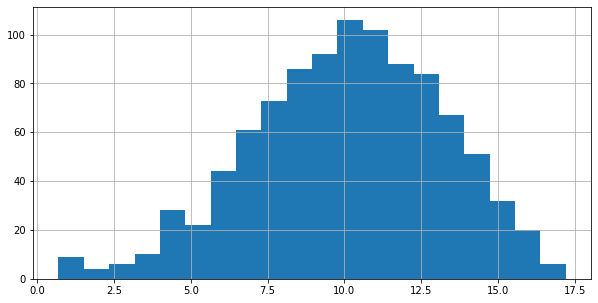

In [47]:
#some checks....
df['TOTAL_AFFECTED'].hist(bins=20, figsize=(10,5)) #this is logarithmic and scaled(0,1)

__________________

________________________

## Imputation and train test split

In [48]:
 #trim. Scaled and logged 1000 < x <5000000
# df_scaled =  df_scaled[df_scaled['TOTAL_AFFECTED'] > 0.4] 
# df_scaled =  df_scaled[df_scaled['TOTAL_AFFECTED'] < 0.9]
df.shape

(991, 76)

In [49]:
# df_scaled.dropna(inplace = True)

In [50]:
from sklearn.impute import KNNImputer

In [51]:
df.shape

(991, 76)

In [52]:
imputer = KNNImputer(n_neighbors=5)
df_filled = pd.DataFrame(imputer.fit_transform(df))
df_filled.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,6.0,117.0,4.094345,116.0,952.0,0.0,33.0,0.0,0.0,0.0,...,67.79,8607.657082,0.0,67.666098,1.053572,1.0,16.298999,15.574055,15.015749,12.175851
1,8.0,141.0,3.044522,116.0,940.0,0.0,31.0,0.0,0.0,0.0,...,67.79,8607.657082,0.0,67.666098,1.053572,1.0,17.268928,16.562266,16.136855,13.372526
2,8.0,15.0,1.098612,110.0,0.0,0.0,17.0,0.0,0.0,0.0,...,69.93,3796.219401,0.0,64.770000,0.947132,1.0,14.339791,14.338512,13.993700,9.913438
3,12.0,231.0,3.583519,120.0,924.0,0.0,11.0,0.0,0.0,0.0,...,25.68,1059.467412,0.0,61.105000,1.014409,2.0,15.375766,14.916344,13.924162,11.002100
4,7.0,84.0,2.197225,110.0,968.0,0.0,15.0,0.0,0.0,0.0,...,25.68,1059.467412,0.0,61.105000,1.014409,2.0,15.450771,14.841368,14.502903,4.634729


In [53]:
df_filled = df_filled.rename(columns = dict(zip(df_filled.columns, df.columns), inplace = True))

In [61]:
X = df_filled[features1] #features

y = df_filled['TOTAL_AFFECTED']

In [62]:
X.shape

(991, 51)

In [63]:
X = df_filled[features1] #features
# X = df_scaled[features3].fillna(df.mean())
y = df_filled['TOTAL_AFFECTED']
print(y.describe())

count    991.000000
mean      10.086995
std        3.102598
min        0.693147
25%        8.018896
50%       10.308953
75%       12.413181
max       17.204028
Name: TOTAL_AFFECTED, dtype: float64


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True,random_state=123) #(X_pca, y, test_size=0.3)

In [65]:
# Scaling the inputs using Standard Scaler as the SVR requires the scaling
from sklearn.preprocessing import StandardScaler
num_columns = ['POP_MAX_64_ADJ','POP_MAX_50_ADJ', 'POP_MAX_34_ADJ','Adjusted savings: education expenditure (% of GNI)',
              'Life expectancy at birth, total (years)', 'Net flows from UN agencies US$', 'GDP per capita (constant 2010 US$)',
              'Food production index (2004-2006 = 100)', 'Cereal yield (kg per hectare)', 'Arable land (hectares per person)',
              'HDI','RURAL_POP(%)', 'POP_DEN_SQ_KM', 'DISTANCE_TRACK', 'DISTANCE_TRACK_VINCENTY', 'V_LAND_KN',
              'MAX_STORMSPEED', 'MIN_DIST2LAND', 'MIN_PRES', 'MAX_WIND']
ss_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
for col in num_columns:
    X_train[col] = ss_scaler.fit_transform(X_train[[col]])
    X_test[col] = ss_scaler.transform(X_test[[col]])
rest_columns = list(set(X_train.columns.to_list()) - set(num_columns))
for col in rest_columns:
    X_train[col] = mm_scaler.fit_transform(X_train[[col]])
    X_test[col] = mm_scaler.transform(X_test[[col]])

/Users/vamsi/Documents/Programming_projects/wfp_challenge/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/vamsi/Documents/Programming_projects/wfp_challenge/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/vamsi/Documents/Programming_projects/wfp_challenge/venv/lib/python3.7/site-packages/ipykernel_launcher.

/Users/vamsi/Documents/Programming_projects/wfp_challenge/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/vamsi/Documents/Programming_projects/wfp_challenge/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/vamsi/Documents/Programming_projects/wfp_challenge/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: Settin

## Random Forest

In [70]:
parameters = {'n_estimators':[100, 500, 1000], 
              'max_depth':[20,500,1000],
              'max_features':[5,10,20,30]              
             }

In [71]:
estimator_RF = RandomizedSearchCV(RandomForestRegressor(), parameters, cv = 5, scoring= 'neg_root_mean_squared_error',n_jobs=2,refit=True,
                            n_iter=20,return_train_score = False)

In [72]:
estimator_RF.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [73]:

print(np.abs(estimator_RF.best_score_))
print(estimator_RF.best_params_)

2.5907112685196307
{'n_estimators': 1000, 'max_features': 10, 'max_depth': 20}


## Gradient Boosting Method

In [74]:
# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1, 2, 100), 'min_samples_leaf': list(range(2, 30))} 
# check with Gradient Boosting
estimator_GBM = RandomizedSearchCV(GradientBoostingRegressor(), param_grid, cv = 5, scoring= 'neg_root_mean_squared_error',n_jobs=2,refit=True,
                            n_iter=20,return_train_score = False)


In [75]:
estimator_GBM.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [76]:
print(np.abs(estimator_GBM.best_score_))
print(estimator_GBM.best_params_)

2.6581565630064574
{'min_samples_leaf': 11, 'learning_rate': 0.21515151515151515}


## Support Vector Regression

In [77]:
# TO DO
svr_parameters = {'kernel' : ('linear', 'poly', 'rbf'),
         'C' : [1,5,10,100],
         'degree' : [3,8],
         'coef0' : [0.01,10,0.5],
         'gamma' : ('auto','scale')}
estimator_SVR = RandomizedSearchCV(SVR(), svr_parameters, cv = 5, scoring= 'neg_root_mean_squared_error',n_jobs=2,refit=True,
                            n_iter=20,return_train_score = False)

In [78]:
estimator_SVR.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=20, n_jobs=2,
                   param_distributions={'C': [1, 5, 10, 100],
                                        'coef0': [0.01, 10, 0.5],
                                        'degree': [3, 8],
                                        'gamma': ('auto', 'scale'),
                                        'kernel': ('linear', 'poly', 'rbf')},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False,
                   scoring='neg_root_mean_squared_error', verbose=0)

In [79]:
print(np.abs(estimator_SVR.best_score_))
print(estimator_SVR.best_params_)

2.6914748442614105
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 8, 'coef0': 0.5, 'C': 1}


Test set performance

In [81]:
# Random Forest
pred_rf = estimator_RF.predict(X_test)
print('Random Forest Model Test RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, pred_rf))))
print('Random Forest R-squared value: {:.3f}'.format(r2_score(y_test, pred_rf)))
print('\n')
# Gradient Boosting Method
pred_gbm = estimator_GBM.predict(X_test)
print('Gradient Boosting Method Test RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, pred_gbm))))
print('Gradient Boosting R-squared value: {:.3f}'.format(r2_score(y_test, pred_gbm)))
print('\n')

# TO DO for SVR
pred_svr = estimator_SVR.predict(X_test)
print('Gradient Boosting Method Test RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, pred_svr))))
print('Gradient Boosting R-squared value: {:.3f}'.format(r2_score(y_test, pred_svr)))

Random Forest Model Test RMSE: 2.406
Random Forest R-squared value: 0.377


Gradient Boosting Method Test RMSE: 2.541
Gradient Boosting R-squared value: 0.305


Gradient Boosting Method Test RMSE: 2.544
Gradient Boosting R-squared value: 0.303


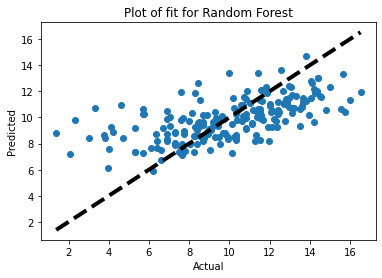

In [82]:
# Plot of fit
fig, ax = plt.subplots()
ax.scatter(y_test, pred_rf)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Plot of fit for Random Forest')
plt.show()

## Ensemble Methods
### Voting Ensemble of RF and GBM

In [0]:
from sklearn.ensemble import VotingRegressor

# List of (string, estimator) tuples
estimators = [('rf', estimator_RF), ('gbm', estimator_GBM)]

# Build and fit an averaging classifier
reg_avg = VotingRegressor(estimators)
reg_avg.fit(X_train, y_train)
cross_val_scores_vot = cross_val_score(reg_avg,X_train, y_train, cv=5, scoring="neg_mean_squared_error")


In [118]:
print("5-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores_vot))))

5-fold RMSE:  2.594371032928154


In [122]:
pred_vot = reg_avg.predict(X_test)
print('Voting regressor Test RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, pred_vot))))
print('Voting regressor R-squared value: {:.3f}'.format(r2_score(y_test, pred_vot)))

Voting regressor Test RMSE: 2.498
Voting regressor R-squared value: 0.328


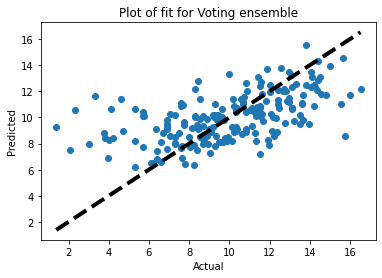

In [124]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_vot)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Plot of fit for Voting ensemble')
plt.show()

### Stack of ensembles

In [123]:
from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Instantiate the 2nd-layer regressor
reg_svr = SVR(kernel='rbf')
reg_adb=AdaBoostRegressor()

# Build the Stacking regressor
reg_stack = StackingRegressor(regressors=[reg_svr, estimator_GBM, estimator_RF], meta_regressor=reg_adb)
reg_stack.fit(X_train, y_train)

# Evaluate the performance on the test set using the MAE metric
pred = reg_stack.predict(X_test)
print('Stack of Ensembles Test RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, pred))))

Stack of Ensembles Test RMSE: 2.418


Stack of Ensembles R-squared value: 0.370


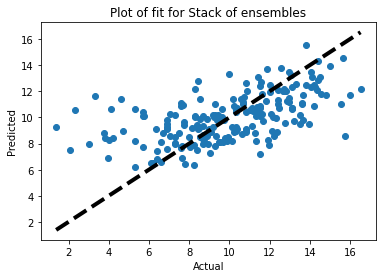

In [126]:
print('Stack of Ensembles R-squared value: {:.3f}'.format(r2_score(y_test, pred)))
fig, ax = plt.subplots()
ax.scatter(y_test, pred_vot)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_xlim(5,16)
plt.title('Plot of fit for Stack of ensembles')
plt.show()

## Auto-ML

In [127]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=50, population_size=500,verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Generation 1 - Current best internal CV score: -6.75851855907501
Generation 2 - Current best internal CV score: -6.689659236441384
Generation 3 - Current best internal CV score: -6.689659236441384
Generation 4 - Current best internal CV score: -6.663290848562767
Generation 5 - Current best internal CV score: -6.663290848562767

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.45, min_samples_leaf=4, min_samples_split=10, n_estimators=100)
-5.96104189586485


### Unit Test

In [0]:
# TO DO
'''
Need to define the input variables and their data types
Kind Attention: Xavier
'''

# mainly checking if model can handle null input entry since we can't expect that user will have all the inputs for sure

from numpy.testing import assert_equal
from numbers import Number
import logging

def test_output(X_input):
  '''
  X_input: 
    Pandas DataFrame object containing input features as columns and instances as rows
  return:
    numeric value
  '''
  # define your strategy in the model wrapper function to pass the unit test
  try:
    estimate=estimator_RF.predict(X_input)# to be replaced with function call
  except AssertionError:
    logging.error("Model failed to predict an estimate...", exc_info=True)
  return estimate

def test_regression_score():
  input_entry=pd.DataFrame()
  result=test_output('NA')
  if isinstance(result, Number):
    print('Passed unit test')
  else:
    print('Failed unit test')
   
test_regression_score()

## Supply chain Estimation based on affected population (head count)

In [0]:
# TO DO

## Scope of improvement:
* Dealing outliers
* Exploring feature scaling impact
* Data Augmentation either by addition or by synthetic method